In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Simulating borrower profiles and financial indicators
np.random.seed(42)
n_samples = 1000
sequence_length = 5  # Length of sequence for each borrower profile

# Simulating borrower profiles and financial indicators
borrower_data = pd.DataFrame({
    'credit_score': np.random.randint(300, 850, n_samples),
    'debt_to_income_ratio': np.random.uniform(0, 1, n_samples),
    'loan_amount': np.random.randint(1000, 100000, n_samples),
    'monthly_income': np.random.randint(1000, 10000, n_samples),
    'open_credit_lines': np.random.randint(0, 20, n_samples),
    'loan_default': np.random.choice([0, 1], size=n_samples, p=[0.8, 0.2])
})
borrower_data.describe()


,credit_score,debt_to_income_ratio,loan_amount,monthly_income,open_credit_lines,loan_default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,563.991000,0.507523,48800.058000,5465.066000,9.885000,0.19300
std,160.508436,0.291419,29061.771183,2545.531549,5.655773,0.39485
min,300.000000,0.003218,1138.000000,1002.000000,0.000000,0.00000
25%,423.750000,0.244882,22577.500000,3420.250000,5.000000,0.00000
50%,553.000000,0.519428,49446.000000,5369.500000,10.000000,0.00000
75%,701.250000,0.758245,74901.000000,7594.500000,15.000000,0.00000
max,849.000000,0.999414,99876.000000,9996.000000,19.000000,1.00000


from matplotlib import pyplot as plt
_df_41['credit_score'].plot(kind='hist', bins=20, title='credit_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42['debt_to_income_ratio'].plot(kind='hist', bins=20, title='debt_to_income_ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43['loan_amount'].plot(kind='hist', bins=20, title='loan_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44['monthly_income'].plot(kind='hist', bins=20, title='monthly_income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_45.plot(kind='scatter', x='credit_score', y='debt_to_income_ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_46.plot(kind='scatter', x='debt_to_income_ratio', y='loan_amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_47.plot(kind='scatter', x='loan_amount', y='monthly_income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48.plot(kind='scatter', x='monthly_income', y='open_credit_lines', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49['credit_score'].plot(kind='line', figsize=(8, 4), title='credit_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_50['debt_to_income_ratio'].plot(kind='line', figsize=(8, 4), title='debt_to_income_ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_51['loan_amount'].plot(kind='line', figsize=(8, 4), title='loan_amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_52['monthly_income'].plot(kind='line', figsize=(8, 4), title='monthly_income')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Reshape data into sequences
X_sequence = []
y_sequence = []
for i in range(len(borrower_data) - sequence_length):
    X_sequence.append(borrower_data.iloc[i:i+sequence_length, :-1].values)
    y_sequence.append(borrower_data.iloc[i+sequence_length, -1])

X_sequence = np.array(X_sequence)
y_sequence = np.array(y_sequence)
print("X_sequence shape:", X_sequence.shape)
print("y_sequence shape:", y_sequence.shape)
print("\nSample X_sequence:")
print(X_sequence[:1])  # Prints first sequence
print("\nSample y_sequence:")
print(y_sequence[:1])  # Prints first target label


X_sequence shape: (995, 5, 5)
y_sequence shape: (995,)

Sample X_sequence:
[[[4.02000000e+02 9.00018642e-01 9.59470000e+04 7.68700000e+03
   7.00000000e+00]
  [7.35000000e+02 8.73890078e-01 6.46900000e+03 6.56500000e+03
   1.40000000e+01]
  [5.70000000e+02 5.97413102e-01 2.98540000e+04 8.24100000e+03
   1.30000000e+01]
  [4.06000000e+02 6.00516860e-01 7.25600000e+03 8.65100000e+03
   1.90000000e+01]
  [3.71000000e+02 6.65036675e-01 7.72560000e+04 6.57500000e+03
   6.00000000e+00]]]

Sample y_sequence:
[0]


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sequence, y_sequence, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (796, 5, 5)
X_test shape: (199, 5, 5)
y_train shape: (796,)
y_test shape: (199,)


In [ ]:
# Build RNN model
model = Sequential([
    LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1, activation='sigmoid')
])

# Compile, train and evaluate
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Accuracy:", accuracy)
y_pred = model.predict(X_test_scaled)
y_pred_binary = np.round(y_pred).astype(int)

profit_per_approved_loan = 1000
loss_per_rejected_loan = 500
profit_per_rejected_loan = 200

profit = np.sum((y_pred_binary == 1) * profit_per_approved_loan) - np.sum((y_pred_binary == 0) * loss_per_rejected_loan * (1 - y_pred))
loss_incorrect_approvals = np.sum((y_pred_binary != y_test) & (y_pred_binary == 1)) * loss_per_rejected_loan
loss_incorrect_rejections = np.sum((y_pred_binary != y_test) & (y_pred_binary == 0)) * profit_per_approved_loan
total_loss = loss_incorrect_approvals + loss_incorrect_rejections
print("Profit:", profit)
print("Loss:", total_loss)


Epoch 1/10
25/25 [==============================] - 5s 52ms/step - loss: 0.6471 - accuracy: 0.6972 - val_loss: 0.6014 - val_accuracy: 0.7789
Epoch 2/10
25/25 [==============================] - 0s 6ms/step - loss: 0.5201 - accuracy: 0.8141 - val_loss: 0.5438 - val_accuracy: 0.7789
Epoch 3/10
25/25 [==============================] - 0s 6ms/step - loss: 0.4803 - accuracy: 0.8141 - val_loss: 0.5352 - val_accuracy: 0.7789
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 0.4754 - accuracy: 0.8141 - val_loss: 0.5386 - val_accuracy: 0.7789
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: 0.4740 - accuracy: 0.8141 - val_loss: 0.5464 - val_accuracy: 0.7789
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 0.4720 - accuracy: 0.8141 - val_loss: 0.5405 - val_accuracy: 0.7789
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 0.4710 - accuracy: 0.8141 - val_loss: 0.5442 - val_accuracy: 0.7789
Epoch 8/10
25/25 [=

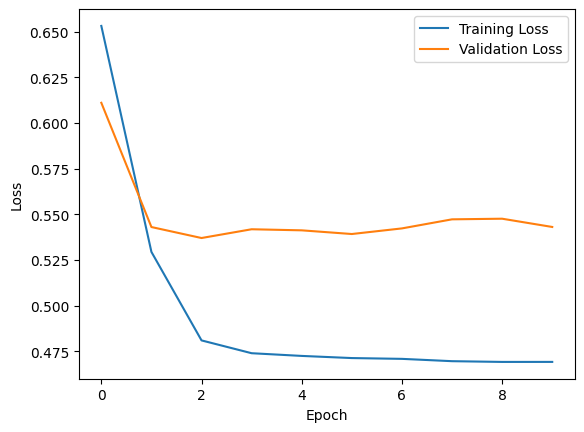

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

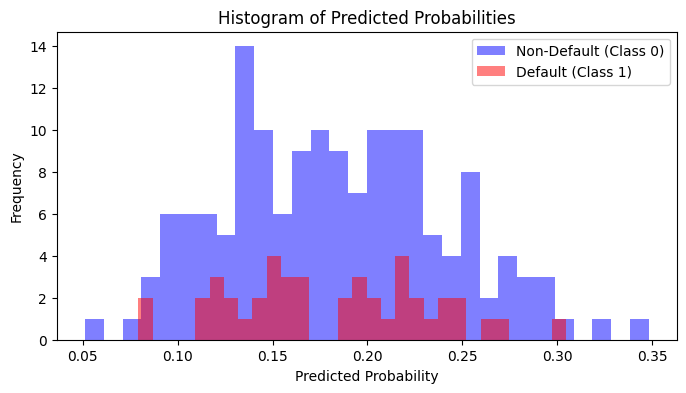

In [ ]:

# Generate histograms for predicted probabilities
plt.figure(figsize=(8, 4))  # Adjust the figsize here to change the size of the plot
plt.hist(y_pred[y_test == 0], bins=30, alpha=0.5, label='Non-Default (Class 0)', color='blue')
plt.hist(y_pred[y_test == 1], bins=30, alpha=0.5, label='Default (Class 1)', color='red')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()


7/7 [==============================] - 0s 5ms/step
Confusion Matrix:
[[155   0]
 [ 44   0]]


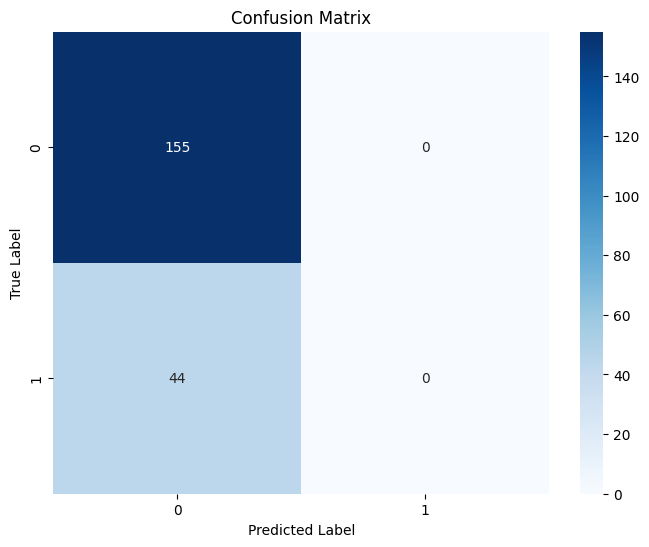

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred_probs = model.predict(X_test_scaled)
y_pred_binary = (y_pred_probs > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

